In [1]:
from importlib import reload
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import copy
import os

### Same Shape Optimiser

In [2]:
part2_path = "./data/same_shape/final_result_cur.csv"
part2_data = pd.read_csv(part2_path)
part2_data['grid_u2'] = str(1)
num_agent_list = [2,4,6,8,10,12]

# True = increase is good x-grid/grid
# False = increase is bad grid-x/grid
percentage_improve_dict = {
    'ft': False,
    'max': False,
    'u1': True,
    'u2': True,
    'conwait': False,
    'penality': False,
}

In [3]:
# data.loc[(data['Dataset'] == NUM_DATASET) & (data['Objective'] == 'Distance')]
def from_objective(obj = 'Distance', attr=None, scheme=None):
    df1 = pd.DataFrame()
    data = part2_data.loc[part2_data['Objective'] == obj]
    df1['Density'] = pd.to_numeric( data['Density'],errors='coerce')
    df1['Agent'] = pd.to_numeric( data['Agent'],errors='coerce')
    
    if scheme[-5:] == 'nosub':
        target = scheme[:-6] + '_' + attr + '_nosub'
    else:
        target = scheme + '_' + attr
        
    target_col = 'Percentage Improved'
    grid_col = 'grid_' + attr
    
    temp = pd.DataFrame()
    temp[grid_col] = pd.to_numeric( data[grid_col],errors='coerce')
    temp[target] = pd.to_numeric( data[target],errors='coerce')
    
    nom = temp[grid_col]
    nom = nom.replace(0,1)
    if percentage_improve_dict[attr]:
        df1[target_col] = (temp[target]-temp[grid_col])*100/nom
    else:
        df1[target_col] = (temp[grid_col]-temp[target])*100/nom
    
    if attr == 'u2':
        a = 1/temp[grid_col]
        b = 1/temp[target]
        df1[target_col] = (b-a)*100/a
        
    if attr == 'conwait':
         df1[target_col] = temp[grid_col]-temp[target]
    
    df1['Objective'] = obj
    df1['Attribute'] = attr
    df1['Scheme'] = scheme
    return df1

In [4]:
scheme_list = ['vor', 'vordir_nosub', 'vordir']
attr_list = ['ft', 'u1', 'u2', 'conwait', 'max']

data1 = pd.DataFrame()
for s_i, scheme in enumerate (scheme_list): 
    for a_i, attr in enumerate (attr_list):
        print("attr", attr, "scheme", scheme)
        df1 = from_objective(obj = 'Distance', attr= attr, scheme=scheme)
        df2 = from_objective(obj = 'Capacity', attr= attr, scheme=scheme)
        df3 = from_objective(obj = 'Both', attr= attr, scheme=scheme)
        if s_i == 0 and a_i == 0:
            data1 = df1
        
        data1 = pd.concat([data1,df1,df2,df3], axis=0)

attr ft scheme vor
attr u1 scheme vor
attr u2 scheme vor
attr conwait scheme vor
attr max scheme vor
attr ft scheme vordir_nosub
attr u1 scheme vordir_nosub
attr u2 scheme vordir_nosub
attr conwait scheme vordir_nosub
attr max scheme vordir_nosub
attr ft scheme vordir
attr u1 scheme vordir
attr u2 scheme vordir
attr conwait scheme vordir
attr max scheme vordir


### Compare Objective Function [Percentage Change w.r.t. to Grid Methods]

In [5]:
# maplist = ['den101d', 'lak105d', 'lak109d']
# data2 = data1
# data2 = data2.loc[data2['Agent'] == 4]
# data2 = data2.loc[data2['Map'] == maplist[0]]
# data2 = data2.loc[data2['Objective'] == "Both"]
# data2.loc[data2['Attribute']=='max']

In [6]:
# data1 = data1.loc[data1['Agent'] != 12]
# data1['Map'] = data1['Map'].replace('den101d', 'Room')
# data1['Map'] = data1['Map'].replace('lak105d', 'Narrow Opening')
# data1['Map'] = data1['Map'].replace('lak109d', 'Tunnel')

data1['Attribute'] = data1['Attribute'].replace('ft', 'Average Flowtime')
data1['Attribute'] = data1['Attribute'].replace('u1', 'Roadmap Utilisation')
data1['Attribute'] = data1['Attribute'].replace('conwait', 'Average Waittime')
data1['Attribute'] = data1['Attribute'].replace('u2', 'Space Efficiency')
data1['Attribute'] = data1['Attribute'].replace('max', 'Heat Count')

data1['Scheme'] = data1['Scheme'].replace('vor', 'Voronoi')
data1['Scheme'] = data1['Scheme'].replace('vordir_nosub', 'Directed Voronoi')
data1['Scheme'] = data1['Scheme'].replace('vordir', 'Directed Voronoi with Pruning')

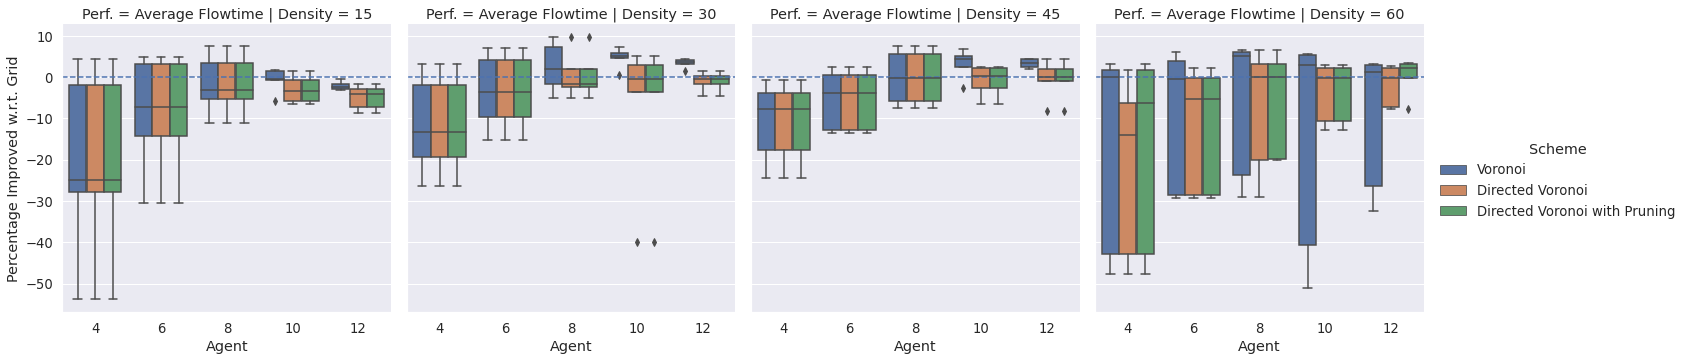

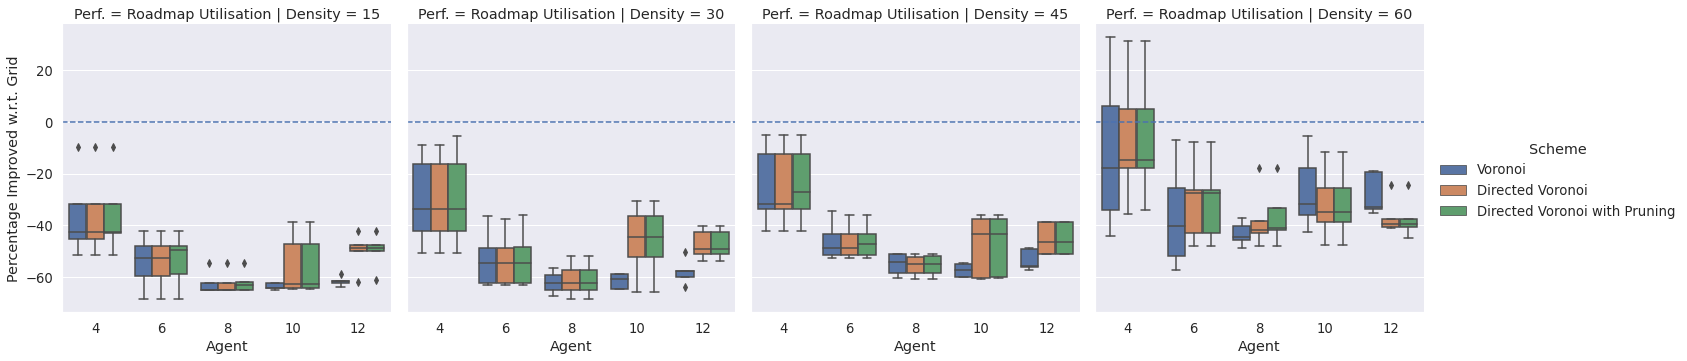

In [7]:
sb.set(font_scale=1.2)
# plt.rcParams["figure.figsize"] = (12, 12)

attr = ['ft', 'u1', 'u2', 'conwait', 'max']
nice_attr = ["Average Flowtime", "Roadmap Utilisation"]
ylim_list = [(-2.1, 0.1), (-1, 2), (3.9,7), (-30, -4.5), (-0.5, 0.5)]

for ai, a in enumerate(nice_attr):
#     maplist = ['Room', 'Narrow Opening', 'Tunnel']
    data2 = data1
    data2 = data2.loc[data2['Agent'] != 2]
    data2 = data2.loc[data2['Attribute'] == nice_attr[ai]]
    data2 = data2.loc[data2['Objective'] == "Both"]
    data2['Perf.'] = data2['Attribute']
    data2['Percentage Improved w.r.t. Grid'] = data2['Percentage Improved']

    g = sb.catplot(x="Agent", y="Percentage Improved w.r.t. Grid", hue="Scheme",
                    kind="box",
                    col='Density',
                    row='Perf.',
                    data=data2,
                    sharex= 'row',
                    sharey = 'row')
    
    for i in range (1):
        ax1, ax2, ax3, ax4 = g.axes[i]
        ax1.axhline(0, ls='--')
        ax2.axhline(0, ls='--')
        ax3.axhline(0, ls='--')
        ax4.axhline(0, ls='--')

    name = '../Report/main_fig/' + 'same_shape_'+ a +'.png'
    g.savefig(name)

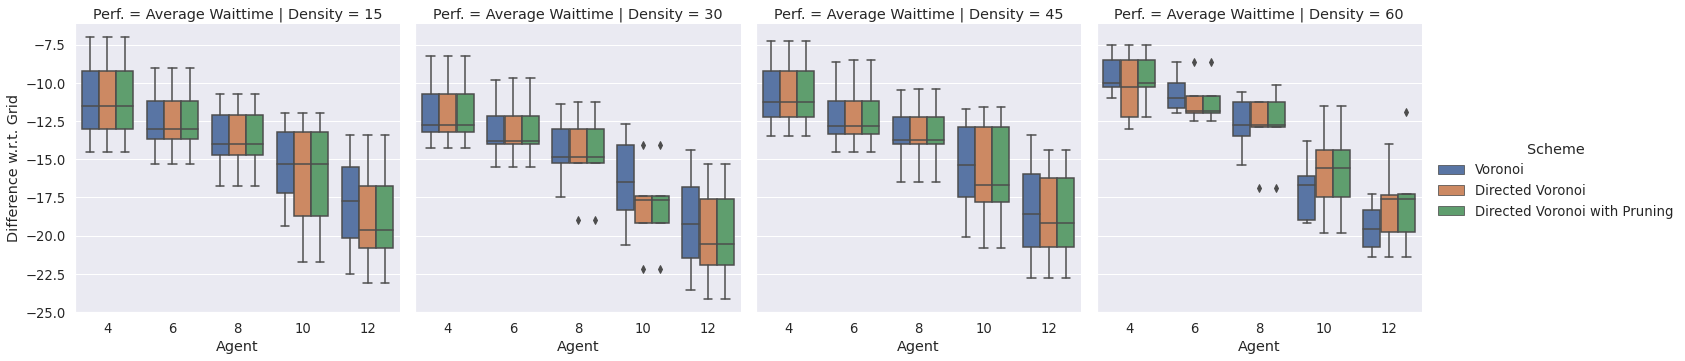

In [8]:
 sb.set(font_scale=1.2)
# plt.rcParams["figure.figsize"] = (12, 12)

attr = ['ft', 'u1', 'u2', 'conwait', 'max']
nice_attr = ['Average Waittime']
ylim_list = [(-2.1, 0.1), (-1, 2), (3.9,7), (-30, -4.5), (-0.5, 0.5)]

for ai, a in enumerate(nice_attr):
#     maplist = ['Room', 'Narrow Opening', 'Tunnel']
    data2 = data1
    data2 = data2.loc[data2['Agent'] != 2]
    data2 = data2.loc[data2['Attribute'] == nice_attr[ai]]
    data2 = data2.loc[data2['Objective'] == "Both"]
    data2['Perf.'] = data2['Attribute']
    data2['Difference w.r.t. Grid'] = data2['Percentage Improved']

    g = sb.catplot(x="Agent", y="Difference w.r.t. Grid", hue="Scheme",
                    kind="box",
                    col='Density',
                    row='Perf.',
                    data=data2)

    name = '../Report/main_fig/' + 'same_shape_'+ a +'.png'
    g.savefig(name)

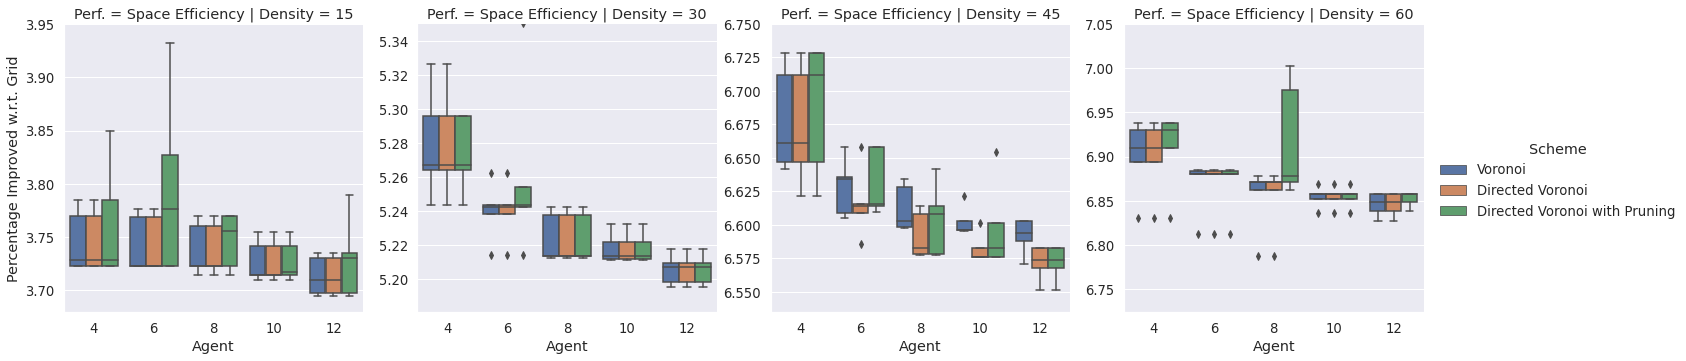

In [23]:
 sb.set(font_scale=1.2)
# plt.rcParams["figure.figsize"] = (12, 12)

attr = ['ft', 'u1', 'u2', 'conwait', 'max']
nice_attr = ['Space Efficiency']
ylim_list = [(-2.1, 0.1), (-1, 2), (3.9,7), (-30, -4.5), (-0.5, 0.5)]

for ai, a in enumerate(nice_attr):
#     maplist = ['Room', 'Narrow Opening', 'Tunnel']
    data2 = data1
    data2 = data2.loc[data2['Agent'] != 2]
    data2 = data2.loc[data2['Attribute'] == nice_attr[ai]]
    data2 = data2.loc[data2['Objective'] == "Both"]
    data2['Perf.'] = data2['Attribute']
    data2['Percentage Improved w.r.t. Grid'] = data2['Percentage Improved']

    g = sb.catplot(x="Agent", y="Percentage Improved w.r.t. Grid", hue="Scheme",
                    kind="box",
                    col='Density',
                    row='Perf.',
                    data=data2,
                    sharex= 'row',
                    sharey = False)
    
    g.axes[0][0].set_ylim((None,3.95))
    g.axes[0][1].set_ylim((None,5.35))
    g.axes[0][2].set_ylim((None,6.75))
    g.axes[0][3].set_ylim((None,7.05))

    name = '../Report/main_fig/' + 'same_shape_'+ a +'.png'
    g.savefig(name)

## Unuse

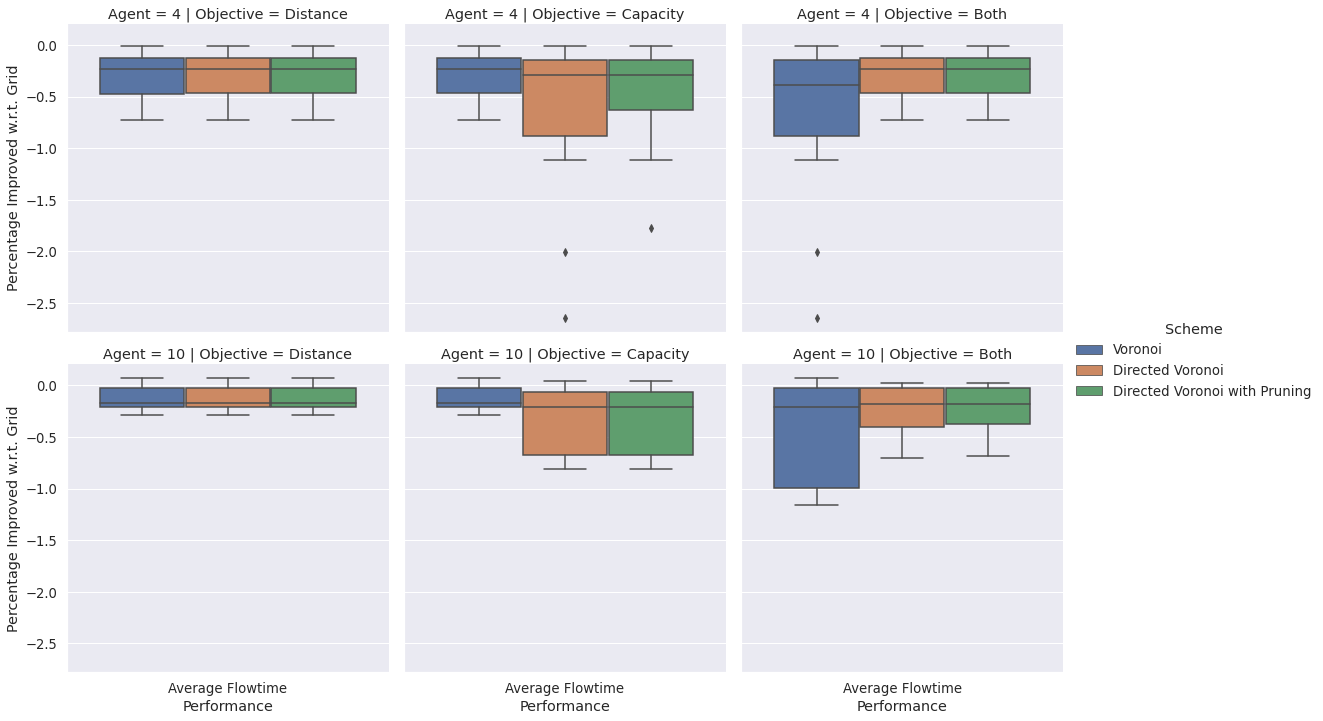

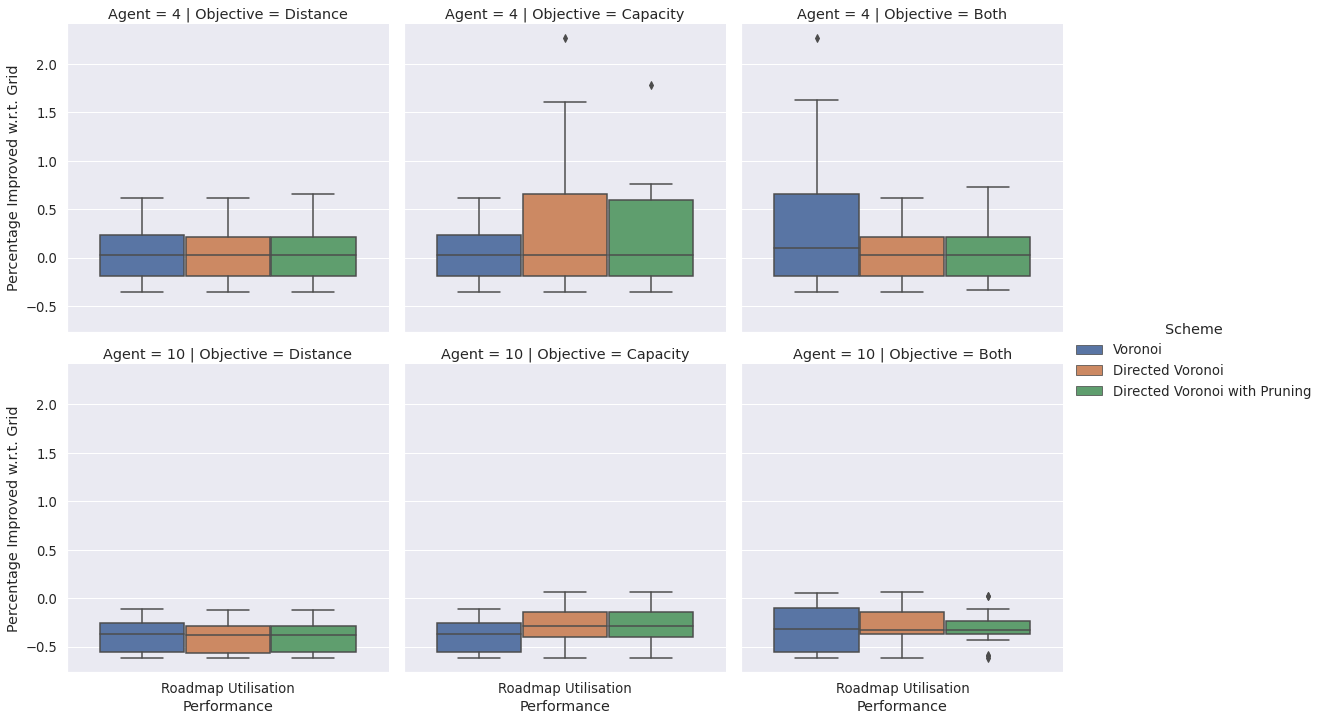

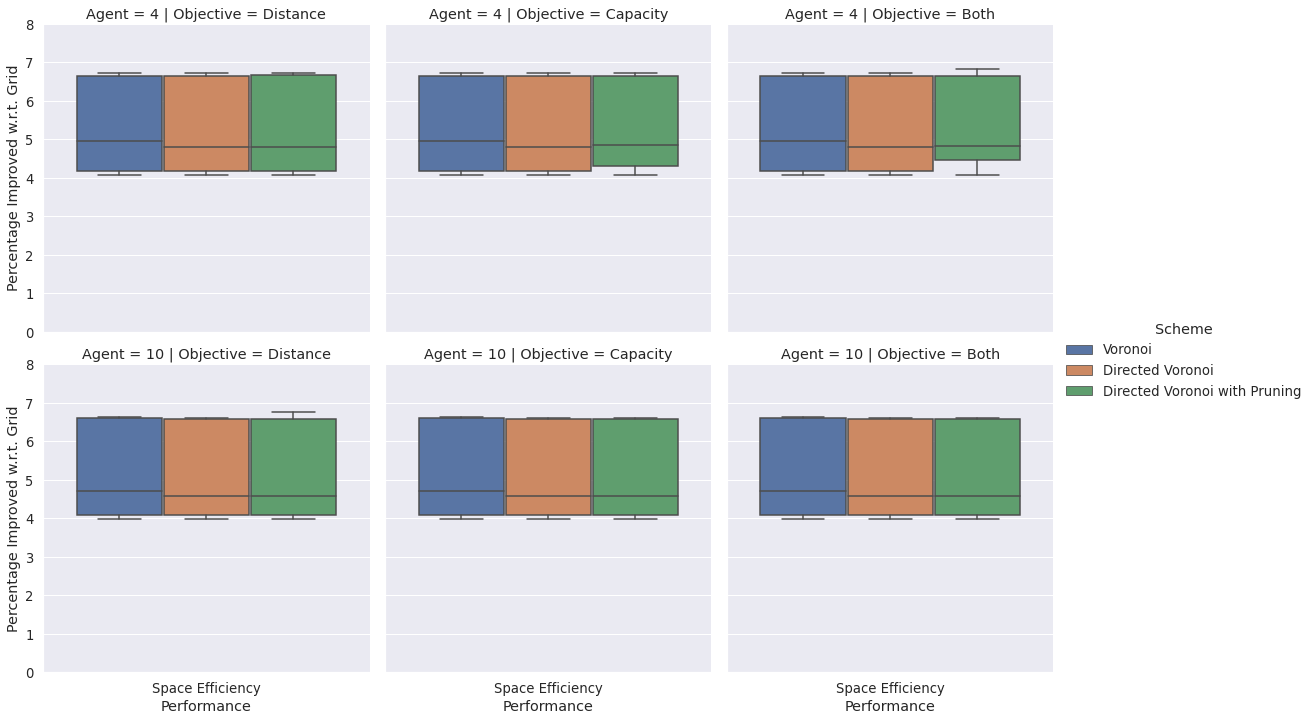

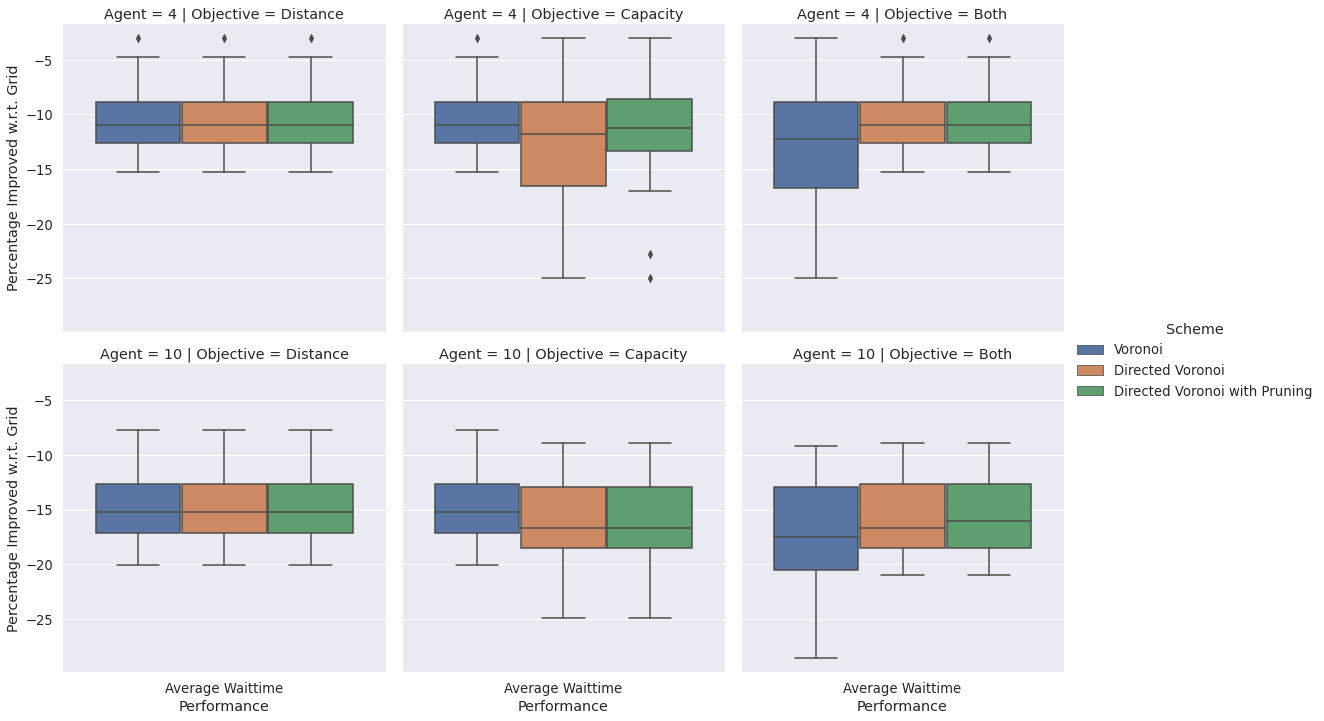

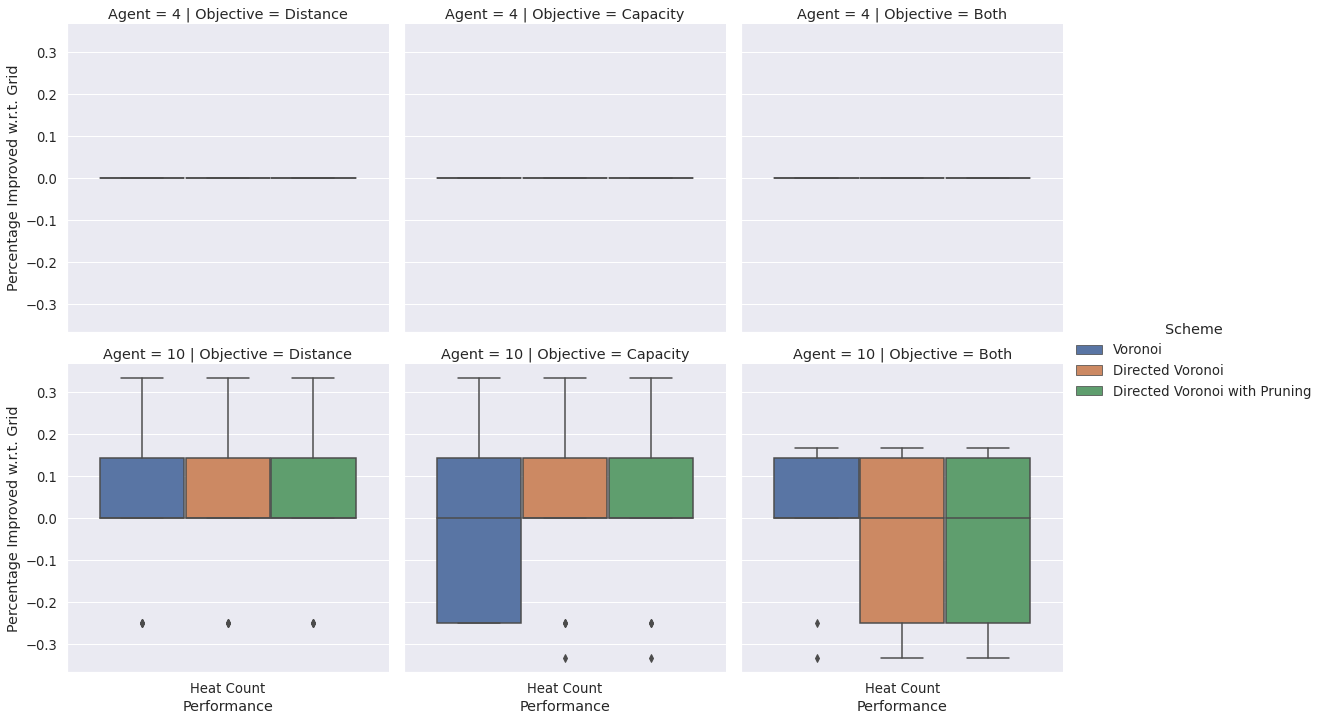

In [8]:
attr = ['ft', 'u1', 'u2', 'conwait', 'max']
nice_attr = ["Average Flowtime", "Roadmap Utilisation", 'Space Efficiency', 'Average Waittime', 'Heat Count']
# ylim_list = [(-2.5, 0.1), (-0.5, 2), (0, 6.5), (-30, -4.5), (-0.5, 0.5)]
ylim = (-1.5,None)

for ai, a in enumerate(attr):
    maplist = ['Room', 'Narrow Opening', 'Tunnel']
    data2 = data1
    data2['Performance'] = data2['Attribute']
#     data.loc[(data['Dataset'] == NUM_DATASET) & (data['Objective'] == 'Distance')]
    data2 = data2.loc[(data2['Agent'] == 10) | (data2['Agent'] == 4)]
#     data2 = data2.loc[data2['Agent'] == 10]
    data2 = data2.loc[data2['Attribute'] == nice_attr[ai]]
    data2['Percentage Improved w.r.t. Grid'] = data2['Percentage Improved']
#     data2 = data2.loc[data2['Attribute'] == 'Average Flowtime']

    g = sb.catplot(x="Performance", y="Percentage Improved w.r.t. Grid", hue="Scheme",
                    kind="box",
                    col='Objective',
                    row='Agent',
                    data=data2)
#                     sharex= 'row',
#                     sharey = 'row')
#                     palette = sb.color_palette("pastel"))
    
    if ai == 2:
        g.set(ylim=(0,8))
#     for ax in g.axes.flat:
#         for label in ax.get_xticklabels():
#             label.set_rotation(45)
    
    name = '../Report/main_fig/' + '2_'+ a +'.png'
    g.savefig(name)

### Table form

In [30]:
attr = ['ft', 'u1', 'u2', 'conwait', 'max']
nice_attr = ["Average Flowtime", "Roadmap Utilisation", 'Space Efficiency', 'Average Waittime', 'Heat Count']
obj_list = ['Distance','Capacity','Both']
scheme = ['Voronoi', 'Directed Voronoi', 'Directed Voronoi with Pruning']

table_np = []

for ai, a in enumerate(nice_attr):
    data2 = data1
    data2['Performance'] = data2['Attribute']
    data2['Percentage Improved w.r.t. Grid'] = data2['Percentage Improved']
    data2 = data2.loc[(data2['Map'] == 'Narrow Opening')]
    data2 = data2.loc[(data2['Attribute'] == a)]
    data2= data2.loc[(data2['Agent'] == 10)]
    temp = [a]
    
    for obj in obj_list:
        data3 = data2.loc[(data2['Objective'] == obj)]
        for s in scheme:
            data4 = data3.loc[(data3['Scheme'] == s)]
#             print(data4)
            m = data4.mean()['Percentage Improved w.r.t. Grid'].round(4)*100
            sd = data4.std()['Percentage Improved w.r.t. Grid'].round(4)
            temp.append(m)
            temp.append(sd)
    
    table_np.append(temp)
    
a = pd.DataFrame(table_np)
    
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Average Flowtime,-20.53,0.0230,-20.53,0.0241,-20.53,0.0241,-20.53,0.0241,-63.59,0.2120,-63.59,0.2120,-107.21,0.0965,-47.48,0.1958,-39.09,0.1696
1,Roadmap Utilisation,-29.77,0.0687,-31.51,0.0693,-31.51,0.0693,-29.77,0.0687,-12.75,0.1593,-12.75,0.1593,-7.39,0.1389,-12.75,0.1593,-18.34,0.1172
2,Space Efficiency,470.77,0.0203,457.19,0.0174,457.19,0.0174,470.77,0.0203,457.19,0.0174,457.19,0.0174,470.77,0.0203,457.19,0.0174,460.00,0.0370
3,Average Waittime,-1525.00,2.0147,-1525.00,2.0147,-1525.00,2.0147,-1525.00,2.0147,-2008.33,4.3037,-2008.33,4.3037,-2443.33,3.6659,-1813.33,2.2853,-1735.00,3.1879
4,Heat Count,-12.50,0.1369,-12.50,0.1369,-12.50,0.1369,-12.50,0.1369,-12.50,0.1369,-12.50,0.1369,0.00,0.0000,-12.50,0.1369,-12.50,0.1369


In [29]:
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Average Flowtime,-42.42,0.2466,-42.42,0.2616,-42.42,0.2616,-42.42,0.2616,-150.58,0.7952,-103.49,0.4777,-150.58,0.7952,-42.42,0.2616,-42.42,0.2616
1,Roadmap Utilisation,35.25,0.2555,35.04,0.2560,35.72,0.2653,35.25,0.2555,118.76,0.7244,88.20,0.5094,119.17,0.7274,35.04,0.2560,35.52,0.2625
2,Space Efficiency,494.06,0.0730,480.46,0.0139,482.32,0.0483,494.06,0.0730,480.46,0.0139,484.61,0.0512,494.06,0.0730,480.46,0.0139,481.94,0.0403
3,Average Waittime,-1145.00,2.6891,-1145.00,2.6891,-1145.00,2.6891,-1145.00,2.6891,-1925.00,6.3738,-1640.00,7.6742,-1925.00,6.3738,-1145.00,2.6891,-1145.00,2.6891
4,Heat Count,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000


## Unuse

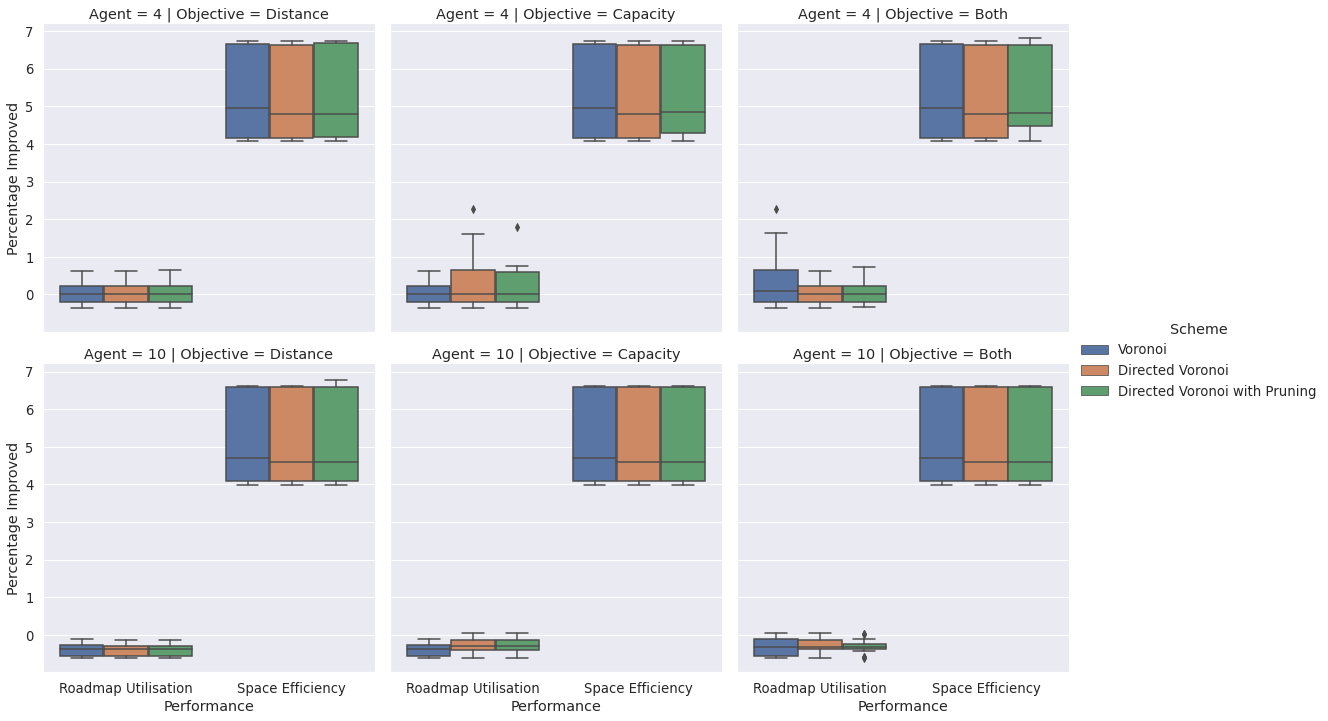

In [52]:
attr = ['ft', 'u1', 'u2', 'conwait', 'max']
nice_attr = ["Average Flowtime", "Roadmap Utilisation", 'Space Efficiency', 'Average Waittime', 'Heat Count']
# ylim_list = [(-2.5, 0.1), (-0.5, 2), (0, 6.5), (-30, -4.5), (-0.5, 0.5)]
ylim = (-25,None)

for ai, a in enumerate(attr):
    maplist = ['Room', 'Narrow Opening', 'Tunnel']
    data2 = data1
    data2['Performance'] = data2['Attribute']
    data2 = data2.loc[(data2['Agent'] == 10) | (data2['Agent'] == 4)]
    data2 = data2.loc[(data2['Attribute'] == 'Roadmap Utilisation') | (data2['Attribute'] == 'Space Efficiency')]

    g = sb.catplot(x="Performance", y="Percentage Improved", hue="Scheme",
                    kind="box",
                    col='Objective',
                    row='Agent',
                    data=data2,
                    sharex= True,
                    sharey = True)


#     for ax in g.axes.flat:
#         for label in ax.get_xticklabels():
#             label.set_rotation(45)
    
#     name = '../Report/main_fig/' + '2_'+ a +'.png'
#     g.savefig(name)
    break

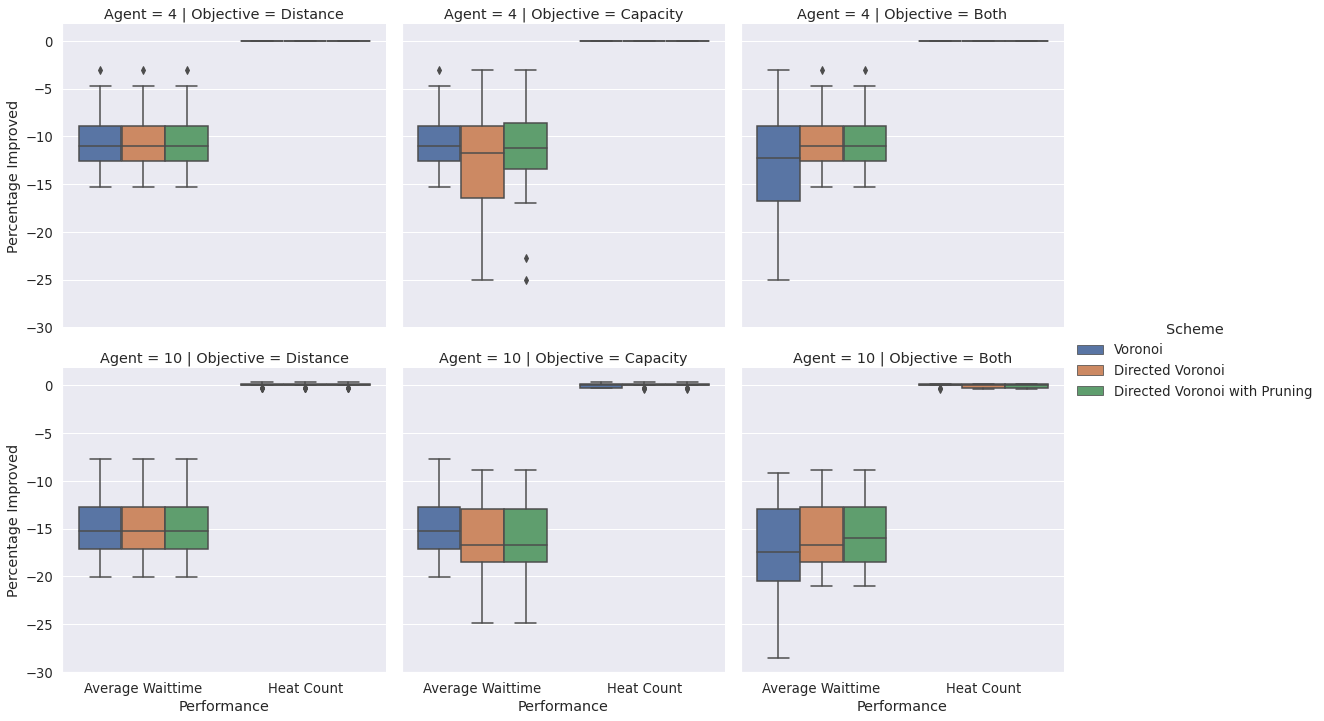

In [53]:
attr = ['ft', 'u1', 'u2', 'conwait', 'max']
nice_attr = ["Average Flowtime", "Roadmap Utilisation", 'Space Efficiency', 'Average Waittime', 'Heat Count']
# ylim_list = [(-2.5, 0.1), (-0.5, 2), (0, 6.5), (-30, -4.5), (-0.5, 0.5)]
ylim = (-25,None)

for ai, a in enumerate(attr):
    maplist = ['Room', 'Narrow Opening', 'Tunnel']
    data2 = data1
    data2['Performance'] = data2['Attribute']
    data2 = data2.loc[(data2['Agent'] == 10) | (data2['Agent'] == 4)]
    data2 = data2.loc[(data2['Attribute'] == 'Average Waittime') | (data2['Attribute'] == 'Heat Count')]

    g = sb.catplot(x="Performance", y="Percentage Improved", hue="Scheme",
                    kind="box",
                    col='Objective',
                    row='Agent',
                    data=data2,
                    sharex= True,
                    sharey = True)


#     for ax in g.axes.flat:
#         for label in ax.get_xticklabels():
#             label.set_rotation(45)
    
#     name = '../Report/main_fig/' + '2_'+ a +'.png'
#     g.savefig(name)
    break

In [67]:
pd.DataFrame({'day': [17, 30], 'month': [1, 12], 'year': [2010, 2017]})

data2

,Map,Agent,Percentage Improved,Objective,Attribute,Scheme,Performance,Percentage Improved w.r.t. Grid
18,Room,4,0.000000,Distance,Heat Count,Voronoi,Heat Count,0.000000
24,Narrow Opening,4,0.000000,Distance,Heat Count,Voronoi,Heat Count,0.000000
30,Tunnel,4,0.000000,Distance,Heat Count,Voronoi,Heat Count,0.000000
72,Room,10,0.000000,Distance,Heat Count,Voronoi,Heat Count,0.000000
78,Narrow Opening,10,0.000000,Distance,Heat Count,Voronoi,Heat Count,0.000000
...,...,...,...,...,...,...,...,...
454,Tunnel,10,0.166667,Both,Heat Count,Directed Voronoi with Pruning,Heat Count,0.166667
460,Tunnel,10,0.142857,Both,Heat Count,Directed Voronoi with Pruning,Heat Count,0.142857
466,Tunnel,10,0.142857,Both,Heat Count,Directed Voronoi with Pruning,Heat Count,0.142857
472,Tunnel,10,0.000000,Both,Heat Count,Directed Voronoi with Pruning,Heat Count,0.000000


### Unuse

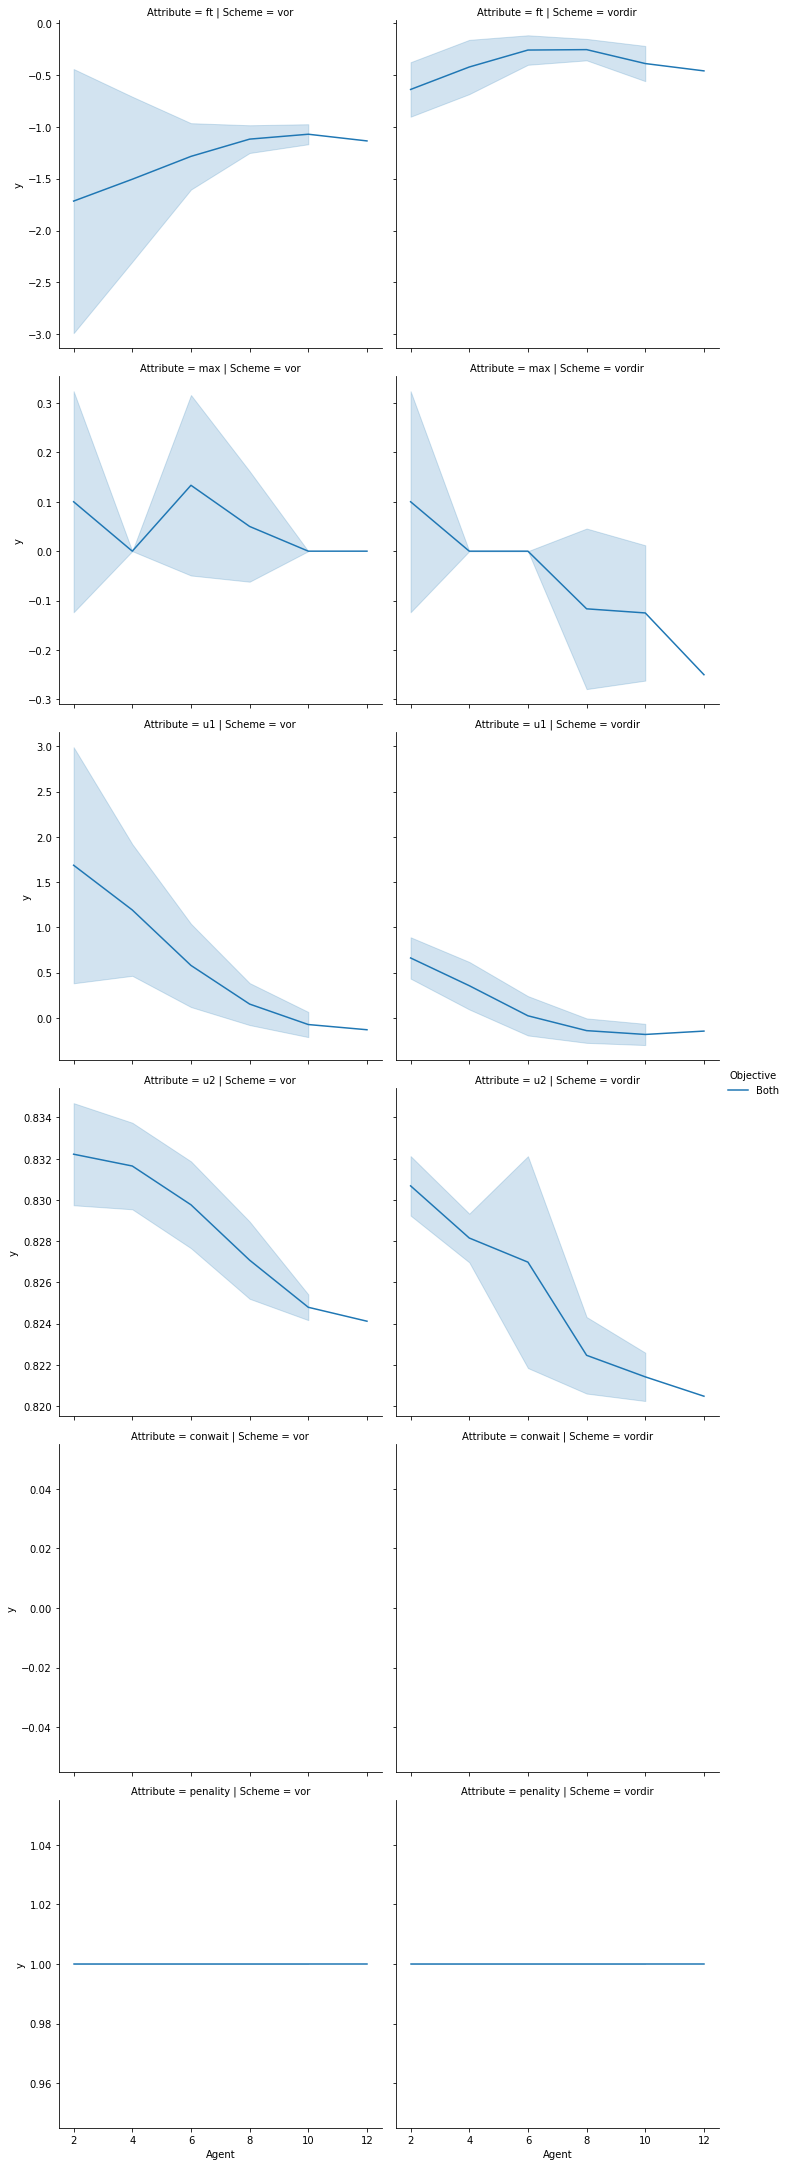

In [113]:
maplist = ['den101d', 'lak105d', 'lak109d']
data2 = data1
data2 = data2.loc[data2['Map'] == maplist[1]]
data2 = data2.loc[data2['Objective'] == "Both"]

ax = sb.relplot(data=data2,
                x="Agent", 
                y="y", 
                hue="Objective", 
                col="Scheme", 
                row = "Attribute",  
                kind="line", 
                ci="sd",
                facet_kws={'sharey': "row", 'sharex': True})

### Compare Scheme[Percentage Change w.r.t. to Grid Methods]

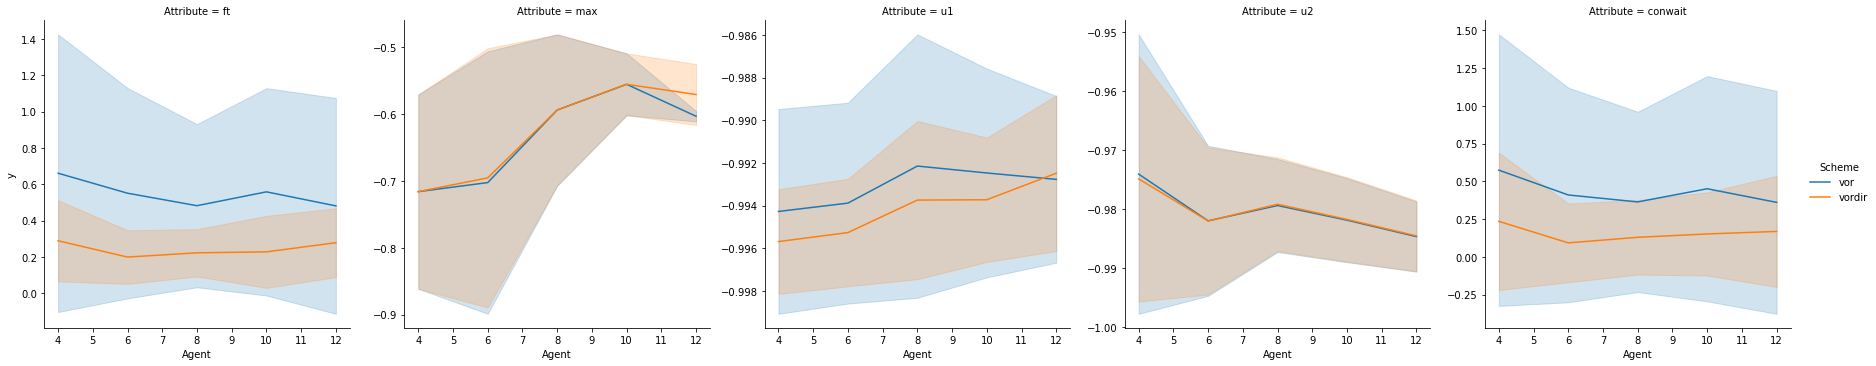

In [52]:
data2 = data1.loc[data1['Objective'] == 'Both']

rel = sb.relplot(data=data2, 
                x="Agent", 
                y="y", 
                hue="Scheme", 
                col = "Attribute",  
                kind="line", 
                ci="sd",
                facet_kws={'sharey': "col", 'sharex': True})

### Compare Map

In [53]:
data2

,Map,Agent,grid_ft,vor_ft,y,Objective,Attribute,Scheme,vor_max,vor_u1,vor_u2,vor_conwait,vordir_ft,vordir_max,vordir_u1,vordir_u2,vordir_conwait
22,den101d,4,2.000000,3.080111,0.540055,Both,ft,vor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,lak105d,4,3.500000,6.053179,0.729480,Both,ft,vor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,lak109d,4,6.250000,7.778811,0.244610,Both,ft,vor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,den101d,6,3.333333,4.816559,0.444968,Both,ft,vor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,lak105d,6,5.333333,15.004865,1.813412,Both,ft,vor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,lak105d,6,12.500000,NaN,-0.760000,Both,max,vordir,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
304,lak109d,6,11.500000,NaN,-0.739130,Both,max,vordir,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
310,lak109d,6,14.000000,NaN,-0.785714,Both,max,vordir,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
316,lak109d,6,15.333333,NaN,-0.739130,Both,max,vordir,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [63]:
maplist = ['den101d', 'lak105d', 'lak109d']

data3 = data2.loc[data2['Map'] == maplist[2]]

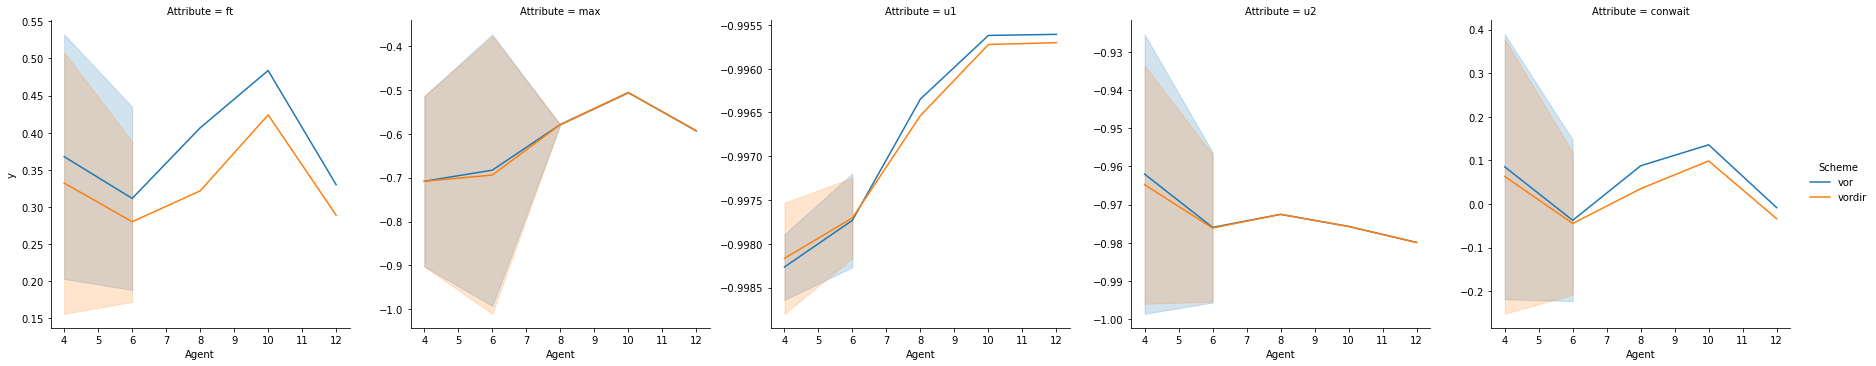

In [60]:
rel = sb.relplot(data=data3, 
                x="Agent", 
                y="y", 
                hue="Scheme", 
                col = "Attribute",  
                kind="line", 
                ci="sd",
                facet_kws={'sharey': "col", 'sharex': True})

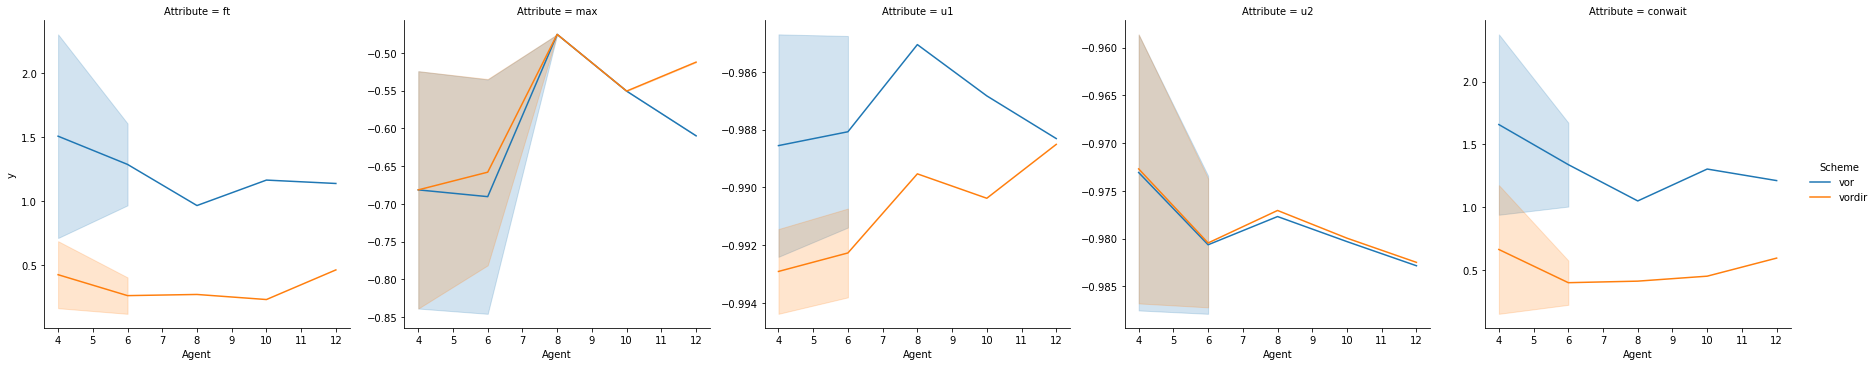

In [62]:
rel = sb.relplot(data=data3, 
                x="Agent", 
                y="y", 
                hue="Scheme", 
                col = "Attribute",  
                kind="line", 
                ci="sd",
                facet_kws={'sharey': "col", 'sharex': True})

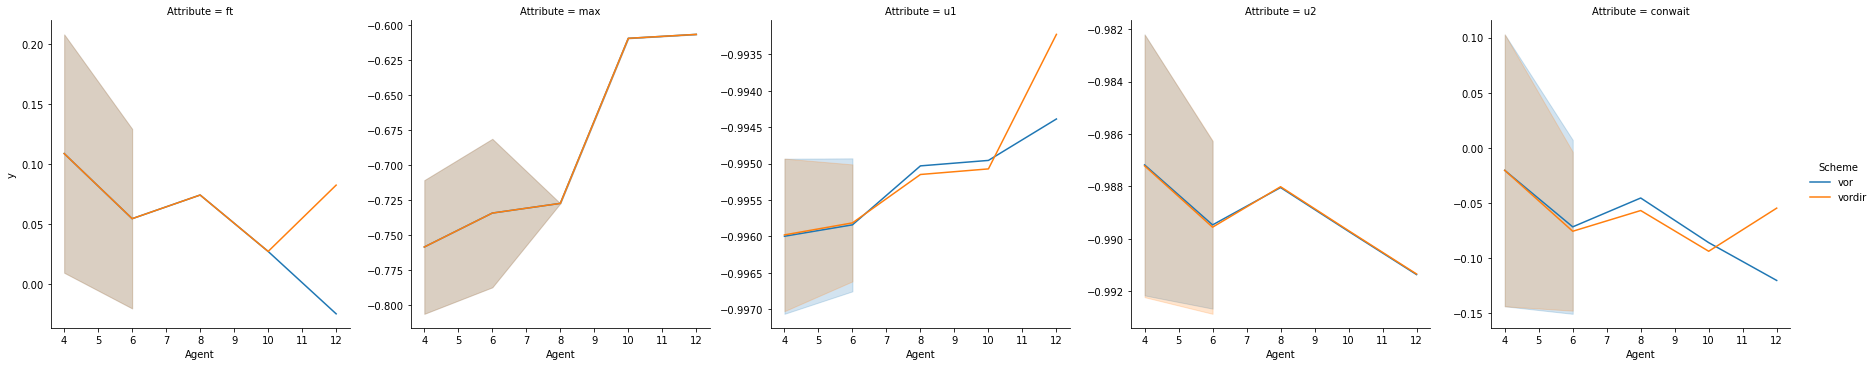

In [64]:
rel = sb.relplot(data=data3, 
                x="Agent", 
                y="y", 
                hue="Scheme", 
                col = "Attribute",  
                kind="line", 
                ci="sd",
                facet_kws={'sharey': "col", 'sharex': True})